# Download Boston's Reported Crime Data

## Download and install Spark

In [3]:
!ls

sample_data


In [0]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

## Setup environment

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

## Downloading and preprocessing Boston's Reported Crime Data

In [0]:
#!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!wget https://data.boston.gov/dataset/eefad66a-e805-4b35-b170-d26e2028c373/resource/ba5ed0e2-e901-438c-b2e0-4acfc3c452b9/download/crime-incident-reports-july-2012-august-2015-source-legacy-system.csv

In [7]:
!ls

crime-incident-reports-july-2012-august-2015-source-legacy-system.csv
sample_data
spark-2.3.1-bin-hadoop2.7
spark-2.3.1-bin-hadoop2.7.tgz


In [0]:
!mv crime-incident-reports-july-2012-august-2015-source-legacy-system.csv reported-crimes.csv

Preprocessiing data

In [9]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('FROMDATE',to_timestamp(col('FROMDATE'),'MM/dd/yyyy hh:mm:ss a')).filter(col('FROMDATE') <= lit('2018-11-11'))
rc.show(5)

+---------+----------+-------------------------+--------------+------------+-------------+-------------------+----------+--------+--------+-----+----+-----+--------+--------+-----------+-----------+-----------+--------------+--------------------+
|  COMPNOS|NatureCode|INCIDENT_TYPE_DESCRIPTION|MAIN_CRIMECODE|REPTDISTRICT|REPORTINGAREA|           FROMDATE|WEAPONTYPE|Shooting|DOMESTIC|SHIFT|Year|Month|DAY_WEEK| UCRPART|          X|          Y| STREETNAME|   XSTREETNAME|            Location|
+---------+----------+-------------------------+--------------+------------+-------------+-------------------+----------+--------+--------+-----+----+-----+--------+--------+-----------+-----------+-----------+--------------+--------------------+
|120420285|    BERPTA|     RESIDENTIAL BURGLARY|          05RB|          D4|          629|2012-07-08 06:00:00|     Other|      No|      No| Last|2012|    7|  Sunday|Part One|763273.1791|2951498.962|ABERDEEN ST|          null|(42.34638135, -71...|
|120419202| 

In [0]:
rc.take(3)

In [0]:
rc.printSchema()

In [14]:
rc.select(col('WEAPONTYPE'), col('FROMDATE')).show(4)

+----------+-------------------+
|WEAPONTYPE|           FROMDATE|
+----------+-------------------+
|     Other|2012-07-08 06:00:00|
|   Firearm|2012-07-08 06:03:00|
|   Firearm|2012-07-08 06:26:00|
|     Other|2012-07-08 06:56:00|
+----------+-------------------+
only showing top 4 rows



In [0]:
from pyspark.sql.functions import lit

In [0]:
#rc.withColumn('One', lit(1)).show(5)

In [10]:
rc.count()
rc.groupBy('WEAPONTYPE').count().orderBy('count',ascending=False).show(truncate=False)

+----------------------------------+------+
|WEAPONTYPE                        |count |
+----------------------------------+------+
|Unarmed                           |194932|
|Other                             |52102 |
|None                              |11319 |
|Firearm                           |5299  |
|Knife                             |3867  |
|Personal Weapon (hand  foot  etc.)|282   |
|Knife/Cutting Instrument          |177   |
|Blunt Object                      |78    |
+----------------------------------+------+



In [11]:
rc.filter(col('Shooting') == 'Yes').count()

697

In [0]:
from pyspark.sql.functions import mean
rc.select(mean(rc.Year)).show()

In [0]:
from pyspark.sql import functions

In [30]:
print(dir(functions))

['AutoBatchedSerializer', 'Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PickleSerializer', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_binary_mathfunctions', '_collect_list_doc', '_collect_set_doc', '_create_binary_mathfunction', '_create_function', '_create_udf', '_create_window_function', '_functions', '_functions_1_4', '_functions_1_6', '_functions_2_1', '_functions_deprecated', '_lit_doc', '_message', '_string_functions', '_test', '_to_java_column', '_to_seq', '_window_functions', '_wrap_deprecated_function', 'abs', 'acos', 'add_months', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'asc', 'ascii', 'asin', 'atan', 'atan2', 'avg', 'base64', 'bin', 'bitwiseNOT', 'blacklist', 'broadcast', 'bround', 'cbrt', 'ceil', 'coalesce', 'col', 'collect_list', 'collect_set', 'column', 'concat', 'concat_ws', 'conv', 'c

In [0]:
from pyspark.sql.functions import substring,min,max,date_add, date_sub, to_date, to_timestamp

In [0]:
help(substring)

In [34]:
rc.select(substring(col('Year'),-2,2)).show(6)

+----------------------+
|substring(Year, -2, 2)|
+----------------------+
|                    12|
|                    12|
|                    12|
|                    12|
|                    12|
|                    12|
+----------------------+
only showing top 6 rows



In [39]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)],['Christmas'])
df.show(1)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [42]:
df.select(to_date(col('Christmas'),'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'),'yyyy-MM-dd HH:mm:ss')).show(1)

+-------------------------------------------+------------------------------------------------+
|to_date(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|to_timestamp(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|
+-------------------------------------------+------------------------------------------------+
|                                 2019-12-25|                             2019-12-25 13:30:00|
+-------------------------------------------+------------------------------------------------+



In [12]:
rc.cache()
rc.count()

268056

In [15]:
rc.filter(col('Shooting') == 'Yes').groupBy(col('DAY_WEEK')).count().orderBy('count',ascending=False).show()
rc.filter(col('Shooting') == 'Yes').groupBy(col('DAY_WEEK')).count().orderBy('count',ascending=False).collect()

+---------+-----+
| DAY_WEEK|count|
+---------+-----+
|   Sunday|  133|
| Saturday|  114|
|   Friday|  103|
| Thursday|   91|
|Wednesday|   87|
|   Monday|   85|
|  Tuesday|   84|
+---------+-----+



[Row(DAY_WEEK='Sunday', count=133),
 Row(DAY_WEEK='Saturday', count=114),
 Row(DAY_WEEK='Friday', count=103),
 Row(DAY_WEEK='Thursday', count=91),
 Row(DAY_WEEK='Wednesday', count=87),
 Row(DAY_WEEK='Monday', count=85),
 Row(DAY_WEEK='Tuesday', count=84)]

In [18]:
dayOfWeek = [x[0] for x in rc.filter(col('Shooting') == 'Yes').groupBy(col('DAY_WEEK')).count().orderBy('count',ascending=False).collect() ]
count = [x[1] for x in rc.filter(col('Shooting') == 'Yes').groupBy(col('DAY_WEEK')).count().orderBy('count',ascending=False).collect() ]
dayOfWeek,count

(['Sunday',
  'Saturday',
  'Friday',
  'Thursday',
  'Wednesday',
  'Monday',
  'Tuesday'],
 [133, 114, 103, 91, 87, 85, 84])

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
cp = pd.DataFrame({'Day_of_week' : dayOfWeek, 'Count' : count})
cp.head(7)

,Day_of_week,Count
0,Sunday,133
1,Saturday,114
2,Friday,103
3,Thursday,91
4,Wednesday,87
5,Monday,85
6,Tuesday,84


Text(0.5, 1.0, 'No. of shootings by day of week')

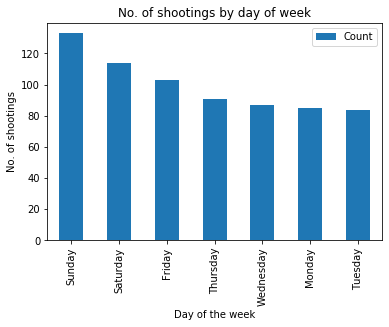

In [24]:
cp.sort_values('Count', ascending=False).plot(kind='bar', x='Day_of_week', y='Count')
plt.xlabel('Day of the week')
plt.ylabel('No. of shootings')
plt.title('No. of shootings by day of week')

##RDDs setup

In [25]:
myrdd = sc.textFile('reported-crimes.csv')
myrdd.first()

'COMPNOS,NatureCode,INCIDENT_TYPE_DESCRIPTION,MAIN_CRIMECODE,REPTDISTRICT,REPORTINGAREA,FROMDATE,WEAPONTYPE,Shooting,DOMESTIC,SHIFT,Year,Month,DAY_WEEK,UCRPART,X,Y,STREETNAME,XSTREETNAME,Location'

In [26]:
header = myrdd.first()
rest = myrdd.filter(lambda line: line != header)
rest.first()

'120420285,BERPTA,RESIDENTIAL BURGLARY,05RB,D4,629,07/08/2012 06:00:00 AM,Other,No,No,Last,2012,7,Sunday,Part One,763273.1791,2951498.962,ABERDEEN ST,,"(42.34638135, -71.10379454)"'

In [27]:
rest.map(lambda line: line.split(',')).count()

268056

In [30]:
(rest.filter(lambda line: line.split(',')[0] in [ '120420285', '120419202']).
 map(lambda line: (line.split(',')[0],
                   line.split(',')[1],
                   line.split(',')[7]
                   )).collect())

[('120420285', 'BERPTA', 'Other'), ('120419202', 'PSHOT ', 'Firearm')]